In [1]:
import os
os.environ['USE_PYGEOS'] = '0'

import geopandas as gpd
from fiona import listlayers

#Este es el geopackage
mapa_ucrania="https://github.com/Joaquin-TC/geodfprepro/raw/main/maps%20and%20data/UcraniaMapa.gpkg"

listlayers(mapa_ucrania)

['ucrania', 'regiones', 'ciudades', 'capitales', 'hidrografia']

In [2]:
ucrania=gpd.read_file(mapa_ucrania, layer="ucrania")
regiones=gpd.read_file(mapa_ucrania, layer="regiones")
ciudades=gpd.read_file(mapa_ucrania, layer="ciudades")
capitales=gpd.read_file(mapa_ucrania, layer="capitales")
hidrografia=gpd.read_file(mapa_ucrania, layer="hidrografia")

In [3]:
#Ejercicio1


#Verificamos que todos tengan el mismo CRS
ucrania.crs.to_epsg()==regiones.crs.to_epsg()==ciudades.crs.to_epsg()==capitales.crs.to_epsg()==hidrografia.crs.to_epsg()

True

In [4]:
#queremos un polígono, clipeamos "regiones" para obtener una ciudad
leopolis=regiones[regiones.Español=='Leópolis']

In [5]:
#veremos las unidades de nuestro mapa (está en metros)
leopolis.crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [6]:
#Por lo tanto, está proyectado
leopolis.centroid

26    POINT (-154858.698 5546733.450)
dtype: geometry

In [7]:
#Sin embargo, la página nos recomienda otro EPSG (9851); por lo tanto, lo cambiaremos
leopolis.crs

<Projected CRS: EPSG:25836>
Name: ETRS89 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 30°E and 36°E: Finland - onshore and offshore; Norway including Svalbard - onshore and offshore.
- bounds: (30.0, 61.73, 36.01, 84.7)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
#Vemos que las unidades están en metros -> está proyectado
leopolis.to_crs(9851).crs.axis_info

[Axis(name=Northing, abbrev=x, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=y, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [9]:
leopolis.to_crs(9851).centroid

26    POINT (293682.159 5509344.833)
dtype: geometry

<Axes: >

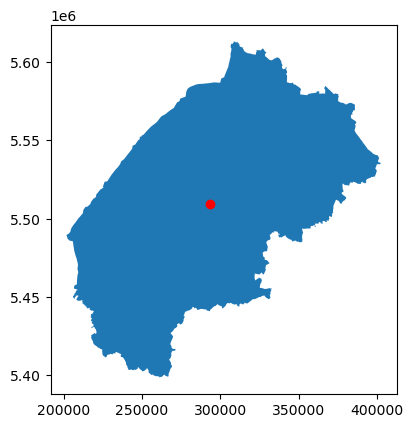

In [10]:
#Lo plotearemos
base9851=leopolis.to_crs(9851).plot()
leopolis.to_crs(9851).centroid.plot(color="red", ax=base9851)

<Axes: title={'center': 'projected (25836)'}>

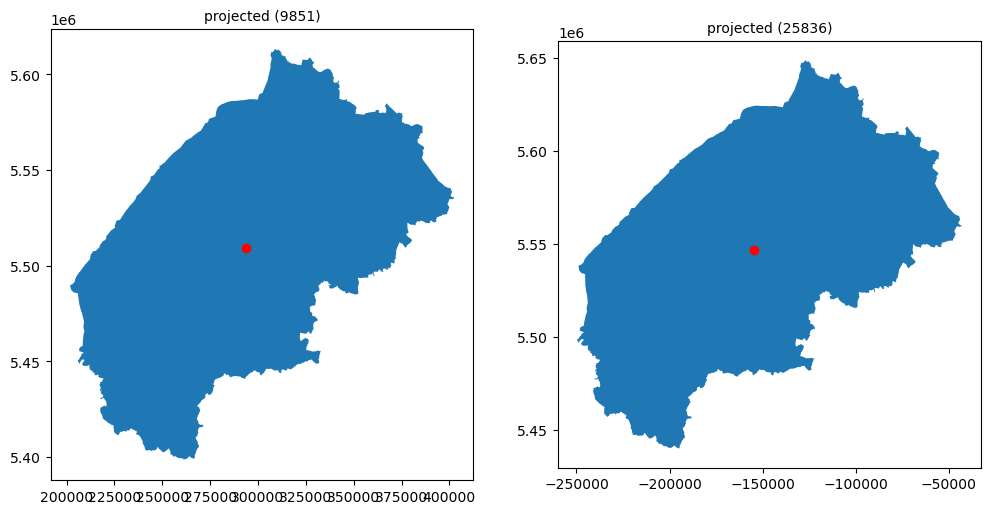

In [11]:
from matplotlib import pyplot
fig, (ax1, ax2) = pyplot.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

ax1.set_title("projected (9851)", fontsize=10)
leopolis.to_crs(9851).plot(ax=ax1)
leopolis.to_crs(9851).centroid.plot(color='red', ax=ax1)

ax2.set_title("projected (25836)", fontsize=10)
leopolis.plot(ax=ax2)
leopolis.centroid.plot(color='red', ax=ax2)


In [12]:
#Proyectamos a todos al mismo CRS, solo Leopolis
leopolis_9851=leopolis.to_crs(9851)
regiones_9851=regiones.to_crs(9851)

ciudades_9851=ciudades.to_crs(leopolis_9851.crs)
ciudades_9851=ciudades_9851[ciudades_9851.Español=='Leópolis']

capitales_9851=capitales.to_crs(leopolis_9851.crs)
capitales_9851=gpd.clip(gdf=capitales_9851, mask=leopolis_9851)

hidrografia_9851=hidrografia.to_crs(leopolis_9851.crs)
hidrografia_9851=gpd.clip(gdf=hidrografia_9851, mask=leopolis_9851)

In [13]:
import os
leopolis_9851.to_file(os.path.join("maps and data", "mapa_leopolis_9851.gpk"), layer ='ucrania', driver="GPKG")
regiones_9851.to_file(os.path.join("maps and data", "mapa_leopolis_9851.gpk"), layer ='regiones', driver="GPKG")
ciudades_9851.to_file(os.path.join("maps and data", "mapa_leopolis_9851.gpk"), layer ='ciudades', driver="GPKG")
capitales_9851.to_file(os.path.join("maps and data", "mapa_leopolis_9851.gpk"), layer ='capitales', driver="GPKG")
hidrografia_9851.to_file(os.path.join("maps and data", "mapa_leopolis_9851.gpk"), layer ='hidrografia', driver="GPKG")

In [14]:
#Ejercicio 2

#Elegimos un multipolígono
regiones_9851

,OBJECTID,Español,UcrRomaniz,Ucraniano,Ruso,UAH,Hryvnia,geometry
0,1,República Autónoma de Crimea,Avtonomna Respublika Krym,Автономна Республіка Крим,Автономная Республика Крым,2600,2600,"MULTIPOLYGON (((1192926.235 5077428.306, 11928..."
1,2,Ciudad de Sebastopol,Sevastopol,Севастопольська,Севастополь,2900,2900,"POLYGON ((1056209.690 5011978.251, 1056256.804..."
2,3,Ciudad de Kiev,Kyivska,Київська,Киевская,3900,3900,"POLYGON ((775916.788 5628275.413, 775918.196 5..."
3,4,Cherníhiv,Chernihivska,Чернігівська,Черниговская,2300,2300,"POLYGON ((926007.117 5844991.601, 926399.516 5..."
4,5,Chernivtsí,Chernivetska,Чернівецька,Черновицкая,2300,2300,"POLYGON ((435596.993 5390604.383, 435626.767 5..."
5,6,Cherksy,Cherkaska,Черкаська,Черкасская,2600,2600,"POLYGON ((879331.515 5597114.142, 879250.353 5..."
6,7,Jmelnitski,Khmelnytska,Хмельницька,Хмельницкая,2600,2600,"MULTIPOLYGON (((563157.806 5525594.622, 563172..."
7,8,Jersón,Khersonska,Херсонська,Херсонская,2300,2300,"MULTIPOLYGON (((962118.822 5139370.994, 962142..."
8,9,Járkov,Kharkivska,Харківська,Харьковская,2900,2900,"POLYGON ((1256262.491 5676404.558, 1256230.160..."
9,10,Sumy,Sumska,Сумська,Сумская,2600,2600,"POLYGON ((967435.213 5849577.852, 967650.288 5..."


In [15]:
#Elegimos Zaporiyia
zaporiyia=regiones[regiones.Español=='Zaporiyia']

In [16]:
#Lo proyectamos según la fuente de internet (9838)
zaporiyia_9838=zaporiyia.to_crs(9838)

In [17]:
#Vemos que es un multipolígono
zaporiyia_9838

,OBJECTID,Español,UcrRomaniz,Ucraniano,Ruso,UAH,Hryvnia,geometry
15,16,Zaporiyia,Zaporizka,Запорізька,Запорожская,2900,2900,"MULTIPOLYGON (((317228.730 5158829.298, 317213..."


In [18]:
#Vemos que está proyectado
zaporiyia_9838.crs.axis_info

[Axis(name=Northing, abbrev=x, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=y, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [19]:
#Necesitamos solo el borde
zaporiyia_9838.boundary

15    MULTILINESTRING ((317228.730 5158829.298, 3172...
dtype: geometry

<Axes: >

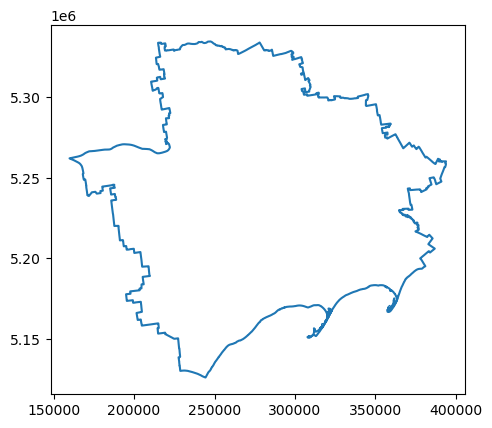

In [20]:
zaporiyia_9838.boundary.plot()

In [21]:
#Sabemos que es un Geoserie
type(zaporiyia_9838.boundary)

geopandas.geoseries.GeoSeries

In [22]:
#Lo convertiremos en un GDF
zaporiyia_9838DF=zaporiyia_9838.boundary.to_frame()

#Creamos una nueva columna
zaporiyia_9838DF['name']='Zaporiyia'

#Le cambiamos el nombre a la columna
zaporiyia_9838DF.rename(columns={0:'geometry'}, inplace=True)

#Lo configuramos como la columna geometría
zaporiyia_9838DF=zaporiyia_9838DF.set_geometry('geometry')

#Verificaremos
zaporiyia_9838DF.crs

<Projected CRS: EPSG:9838>
Name: UCS-2000 / LCS-23 Zaporizhzhia
Axis Info [cartesian]:
- x[north]: Northing (metre)
- y[east]: Easting (metre)
Area of Use:
- name: Ukraine - Zaporizhzhia region (oblast).
- bounds: (34.17, 46.07, 37.25, 48.15)
Coordinate Operation:
- name: Local coordinate system of Zaporizhzhia region
- method: Transverse Mercator
Datum: Ukraine 2000
- Ellipsoid: Krassowsky 1940
- Prime Meridian: Greenwich

In [23]:
#Añadimos este layer
zaporiyia_9838DF.to_file(os.path.join('maps and data', 'zaporiyia_9838DF.gpkg'), layer='border', driver='GPKG')

In [24]:
#Ejercicio 3

states=gpd.read_file(os.path.join('maps and data', 'ukr12', 'ukr_admbnda_adm1_sspe_20230201.shp'))
municipalities=gpd.read_file(os.path.join('maps and data', 'ukr12', 'ukr_admbnda_adm2_sspe_20230201.shp'))
adm3=gpd.read_file(os.path.join('maps and data', 'ukr12', 'ukr_admbnda_adm3_sspe_20230201.shp'))

In [25]:
states.crs, municipalities.crs, adm3.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

<Axes: >

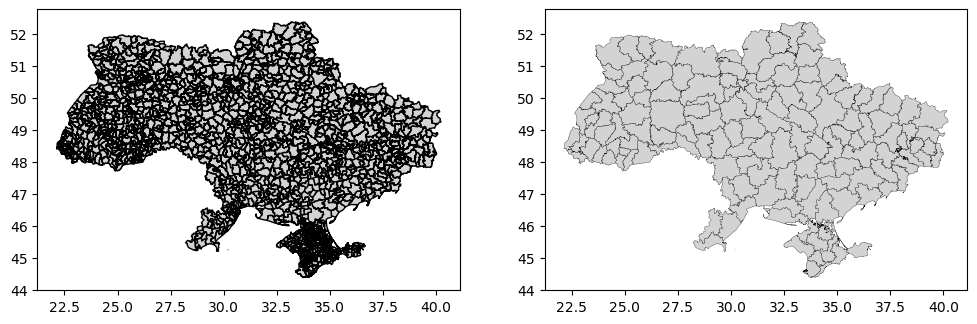

In [26]:
#Lo graficamos y podemos observar que vienen paquetes proyectados
fig, (ax1, ax2) = pyplot.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

adm3.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [27]:
#Al estar con un CRS, no será necesario darle un CRS primero
#Sin embargo, se nos recomienda otra proyección
adm3_9838=adm3.to_crs(9838)
municipalities_9838=municipalities.to_crs(9838)

In [28]:
#Agregamos los layers
adm3_9838.to_file(os.path.join("maps and data","ukraineMap_6381.gpkg"), layer='adm3', driver="GPKG")
municipalities_9838.to_file(os.path.join("maps and data","ukraineMap_6381.gpkg"), layer='municipalities', driver="GPKG")

<Axes: >

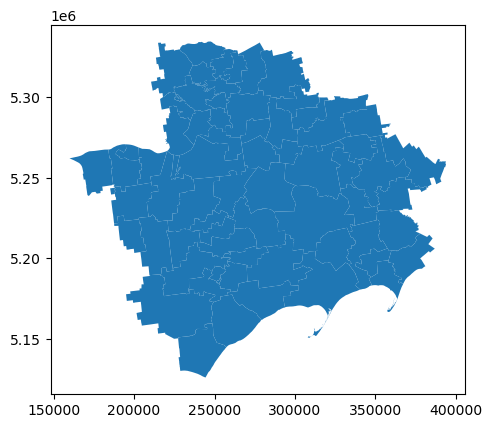

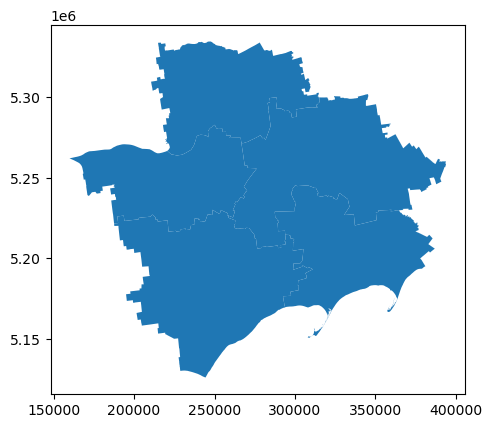

In [29]:
#clipearemos adm3 y municipalidades
clip_adm3_9838=gpd.clip(gdf=adm3_9838, mask=zaporiyia_9838)
clip_municipalities_9838=gpd.clip(gdf=municipalities_9838, mask=zaporiyia_9838)
clip_adm3_9838.plot()
clip_municipalities_9838.plot()

In [30]:
clip_municipalities_9838

,ADM2_EN,ADM2_UA,ADM2_RU,ADM2_PCODE,ADM2_REF,ADM1_EN,ADM1_UA,ADM1_RU,ADM1_PCODE,ADM0_EN,ADM0_UA,ADM0_RU,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,geometry
48,Melitopolskyi,Мелітопольський,Мелитопольский,UA2308,NaN,Zaporizka,Запорізька,Запорожская,UA23,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,5.879364,0.820031,"POLYGON ((253227.110 5227460.667, 253229.642 5..."
45,Berdianskyi,Бердянський,Бердянский,UA2302,NaN,Zaporizka,Запорізька,Запорожская,UA23,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,6.500379,0.527143,"MULTIPOLYGON (((317223.848 5158819.853, 317213..."
33,Mariupolskyi,Маріупольський,Мариупольский,UA1414,NaN,Donetska,Донецька,Донецкая,UA14,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,4.353621,0.312537,"MULTIPOLYGON (((381099.819 5195003.287, 381018..."
46,Vasylivskyi,Василівський,Васильевский,UA2304,NaN,Zaporizka,Запорізька,Запорожская,UA23,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,4.619737,0.512962,"POLYGON ((250532.838 5282104.953, 250559.676 5..."
49,Polohivskyi,Пологівський,Пологовский,UA2310,NaN,Zaporizka,Запорізька,Запорожская,UA23,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,6.998825,0.806983,"MULTIPOLYGON (((345054.382 5298677.815, 344987..."
28,Volnovaskyi,Волноваський,Волновахский,UA1404,NaN,Donetska,Донецька,Донецкая,UA14,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,5.740361,0.533805,"MULTIPOLYGON (((391938.417 5260182.475, 391440..."
47,Zaporizkyi,Запорізький,Запорожский,UA2306,NaN,Zaporizka,Запорізька,Запорожская,UA23,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,5.387346,0.563542,"POLYGON ((250407.680 5333014.263, 250422.875 5..."
118,Henicheskyi,Генічеський,Генический,UA6504,NaN,Khersonska,Херсонська,Херсонская,UA65,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,8.593075,0.762152,"MULTIPOLYGON (((190290.672 5220127.222, 190289..."
119,Kakhovskyi,Каховський,Каховский,UA6506,NaN,Khersonska,Херсонська,Херсонская,UA65,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,6.544424,0.741224,"MULTIPOLYGON (((165595.188 5259322.039, 166213..."
23,Nikopolskyi,Нікопольський,Никопольский,UA1208,NaN,Dnipropetrovska,Дніпропетровська,Днепропетровская,UA12,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,3.968709,0.388721,"MULTIPOLYGON (((214014.401 5320877.690, 214035..."


<Axes: >

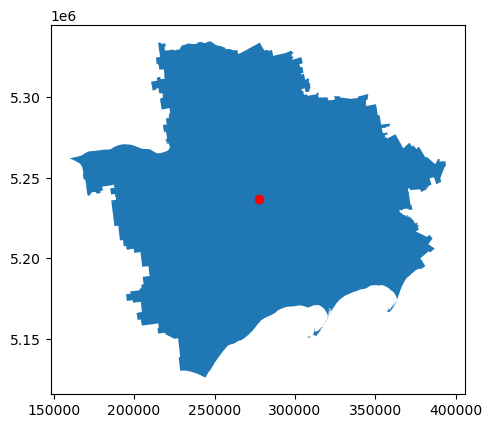

In [31]:
#Graficamos el centroide de Zaporiyia
zapo9838=zaporiyia.to_crs(9838).plot()
zaporiyia_9838.centroid.plot(color="red", ax=zapo9838)

<Axes: title={'center': 'Below Centroid'}>

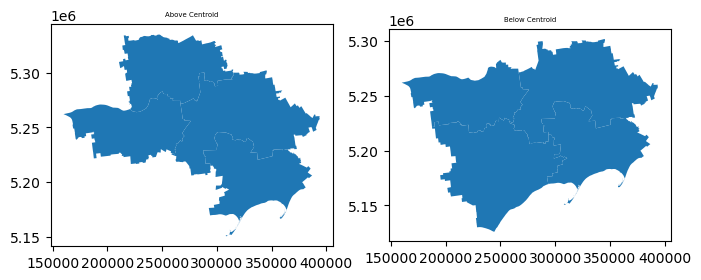

In [32]:
#Como sabemos, nuestras GDF tienen CRS, además, su proyección es la recomendada
#Ahora usaremos a Zaporiyia
centro_zaporiyia=zaporiyia_9838.centroid
fig, axs = pyplot.subplots(ncols=2,sharex=False, sharey=False,figsize=(8,8))

axs[0].set_title('Above Centroid', fontsize=5)
clip_municipalities_9838.cx[:, centro_zaporiyia.y:].plot(ax=axs[0])

axs[1].set_title('Below Centroid', fontsize=5)
clip_municipalities_9838.cx[:, :centro_zaporiyia.y].plot(ax=axs[1])



In [33]:
#Graficamos el norte de la ciudad como polígono
zaporiyia_top=clip_municipalities_9838.cx[:, centro_zaporiyia.y:].dissolve()
zaporiyia_top

,geometry,ADM2_EN,ADM2_UA,ADM2_RU,ADM2_PCODE,ADM2_REF,ADM1_EN,ADM1_UA,ADM1_RU,ADM1_PCODE,ADM0_EN,ADM0_UA,ADM0_RU,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area
0,"MULTIPOLYGON (((171936.650 5238733.520, 171930...",Berdianskyi,Бердянський,Бердянский,UA2302,NaN,Zaporizka,Запорізька,Запорожская,UA23,Ukraine,Україна,Украина,UA,2023-01-30,2023-02-01,NaN,6.500379,0.527143


In [34]:
#Ahora
zaporiyia_top['zone']='N'
zaporiyia_top=zaporiyia_top.loc[:,['ADM2_EN','zone','geometry']]   
zaporiyia_top

,ADM2_EN,zone,geometry
0,Berdianskyi,N,"MULTIPOLYGON (((171936.650 5238733.520, 171930..."


<Axes: >

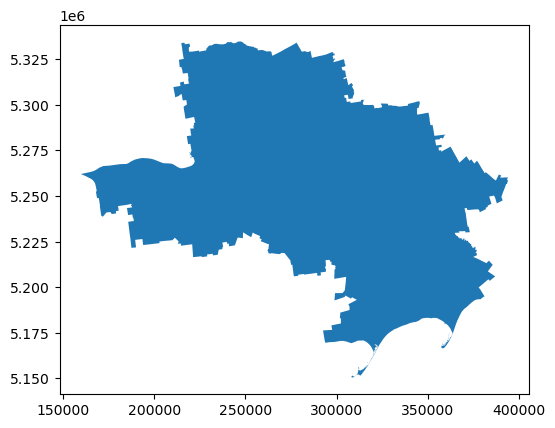

In [35]:
#Este es el resultado
zaporiyia_top.plot()

In [36]:
#Identificamos si hay duplicados en la partición
rowsCX=(clip_municipalities_9838.cx[:, centro_zaporiyia.y:].shape[0],\
clip_municipalities_9838.cx[:, :centro_zaporiyia.y].shape[0])
sum(rowsCX)

17

In [37]:
#Vemos que la partición no es exacta, e repiten 5 distritos
sum(rowsCX)-clip_municipalities_9838.shape[0]

5

In [39]:
#Ejercicio extra
#Qué tipos de ciudades están definidas en el gdf?

In [40]:
from folium import LayerControl
regiones_6381=regiones.to_crs(6381)
ciudades_6381=ciudades.to_crs(6381)

m = ciudades_6381[ciudades_6381.Tipo=='Ciudad'].explore(color="red",name="Ciudades",show=False)
m = ciudades_6381[ciudades_6381.Tipo=='Capital de Oblast'].explore(m=m, color="blue",name="Capital de Oblast",show=False)
m = ciudades_6381[ciudades_6381.Tipo=='Capital Nacional y de Oblast'].explore(m=m, color="green",name="Capital Nacional y de Oblasts",show=False)

LayerControl(collapsed=False).add_to(m)
m


In [41]:
#Exportamos el mapa proyectado
ciudades_6381.to_file(os.path.join("maps and data","Ucrania_6381.gpkg"),layer='ciudades2', driver="GPKG")

<Axes: >

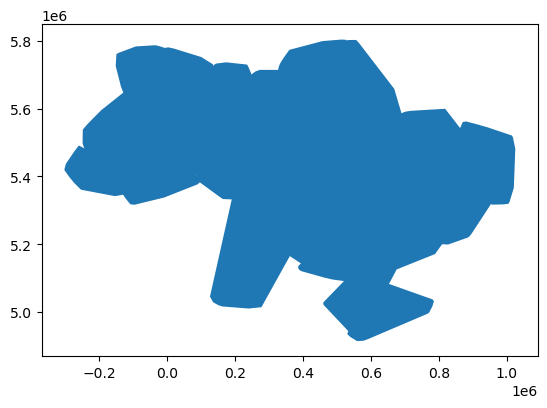

In [42]:
#Ejercicio 5
#Creando un polígono convexo
regiones.convex_hull.plot()


In [43]:
#Ahora le agregaremos puntos
oblasts=ciudades_6381[ciudades_6381.Tipo=='Capital de Oblast']
oblasts

,OBJECTID_1,Español,UcrRomaniz,Ucraniano,Ruso,Tipo,geometry
0,1,Sebastopol,Sevastopolska,Севастопольська,Севастопольский,Capital de Oblast,POINT (1306874.272 5012506.735)
7,8,Simferopolskyi,Simferopolskyi,Сімферопольський,Симферопольский,Capital de Oblast,POINT (1310838.367 5065433.475)
46,47,Odesa,Odeska,Одеська,Одесский,Capital de Oblast,POINT (1045952.830 5195171.945)
56,57,Jersón,Khersonska,Херсонська,Херсонский,Capital de Oblast,POINT (1188815.916 5237806.612)
71,72,Mykoláiv,Mykolaivska,Миколаївська,Николаевский,Capital de Oblast,POINT (1138172.846 5260909.584)
136,137,Zaporiyia,Zaporizka,Запорізька,Запорожский,Capital de Oblast,POINT (1360664.029 5400127.347)
154,155,Donetsk,Donetska,Донецька,Донецкий,Capital de Oblast,POINT (1556581.690 5454063.880)
218,219,Dniprovska,Dniprovska,Дніпровська,Днепровский,Capital de Oblast,POINT (1333969.162 5466050.178)
227,228,Kirovogrado,Kirovohradska,Кіровоградська,Кировоградский,Capital de Oblast,POINT (1129938.923 5438084.068)
229,230,Chernivtsí,Chernivetska,Чернівецька,Черновицкий,Capital de Oblast,POINT (666520.662 5365860.790)


In [44]:
#Convertimos a multipunto
oblasts.unary_union
gpd.GeoSeries(oblasts.unary_union)

0    MULTIPOINT (394715.827 5388473.717, 517063.610...
dtype: geometry

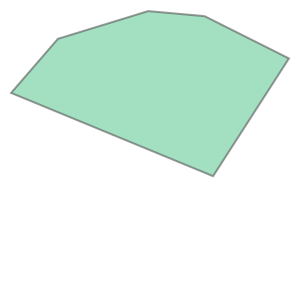

In [45]:
oblasts.unary_union.convex_hull

In [46]:
type(oblasts.unary_union.convex_hull)

shapely.geometry.polygon.Polygon

<Axes: >

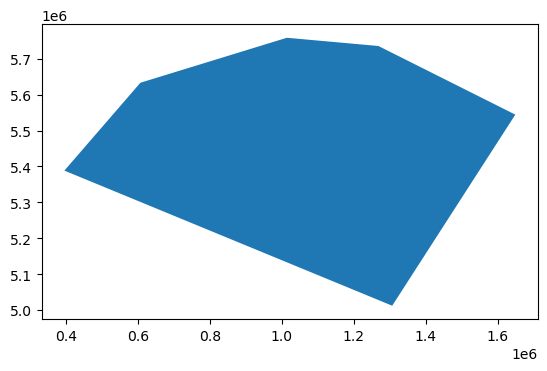

In [47]:
#Funciona para una Geoserie
gpd.GeoSeries(oblasts.unary_union.convex_hull).plot()

In [48]:
#Lo convertiremos en un GDF
oblasts_hull=gpd.GeoSeries(oblasts.unary_union.convex_hull).to_frame()
oblasts_hull

,0
0,"POLYGON ((1306874.272 5012506.735, 394715.827 ..."


In [49]:
#Le damos CRS
oblasts_hull.rename(columns={0:'geometry'},inplace=True)
oblasts_hull['name']='capital de oblasts hull' # optional
oblasts_hull=oblasts_hull.set_geometry('geometry')
oblasts_hull.crs="EPSG:6381"
#y verificamos:
oblasts_hull.crs

<Projected CRS: EPSG:6381>
Name: UCS-2000 / Ukraine TM zone 7
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Ukraine - west of 22°30'E.
- bounds: (22.15, 48.24, 22.5, 48.98)
Coordinate Operation:
- name: Ukraine TM zone 7
- method: Transverse Mercator
Datum: Ukraine 2000
- Ellipsoid: Krassowsky 1940
- Prime Meridian: Greenwich

<Axes: >

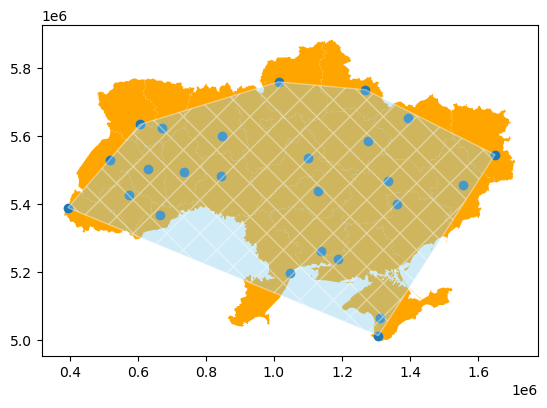

In [50]:
#Ahora lo graficamos
base=regiones_6381.plot(facecolor='orange')
oblasts.plot(ax=base)
oblasts_hull.plot(ax=base,facecolor='skyblue',
                       edgecolor='white',alpha=0.4,
                       hatch='x')

In [51]:
oblasts_hull.explore()

In [52]:
#Analizaremos la validez de los polígonos (adm3 y municipalities son válidos)
adm3_9838[~adm3_9838.is_valid]

,Shape_Leng,Shape_Area,ADM3_EN,ADM3_UA,ADM3_RU,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM3ALT1UA,...,ADM1_RU,ADM1_PCODE,ADM0_EN,ADM0_UA,ADM0_RU,ADM0_PCODE,date,validOn,validTo,geometry


In [53]:
municipalities_9838[~municipalities_9838.is_valid]

,ADM2_EN,ADM2_UA,ADM2_RU,ADM2_PCODE,ADM2_REF,ADM1_EN,ADM1_UA,ADM1_RU,ADM1_PCODE,ADM0_EN,ADM0_UA,ADM0_RU,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,geometry


In [54]:
regiones_6381[~regiones_6381.is_valid]

,OBJECTID,Español,UcrRomaniz,Ucraniano,Ruso,UAH,Hryvnia,geometry
3,4,Cherníhiv,Chernihivska,Чернігівська,Черниговская,2300,2300,"POLYGON ((1129380.589 5875438.542, 1129773.783..."
16,17,Zhytómyr,Zhytomyrska,Житомирська,Житомирская,2300,2300,"POLYGON ((778969.232 5540472.223, 778964.846 5..."


<Axes: >

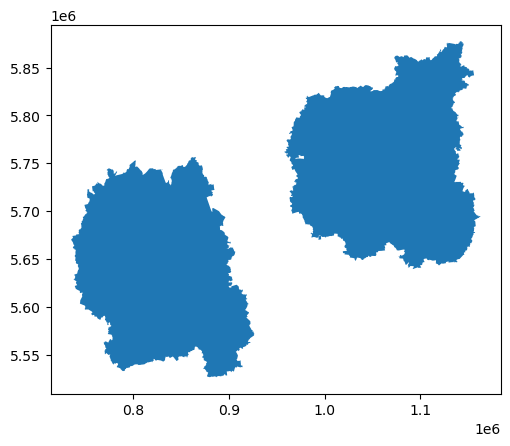

In [55]:
regiones_6381[~regiones_6381.is_valid].plot()

In [56]:
# qué lo hace inválido?

from shapely.validation import explain_validity, make_valid

explain_validity(regiones_6381[~regiones_6381.is_valid].geometry)

3     Ring Self-intersection[977877.019137222 575467...
16    Ring Self-intersection[778969.231764581 554047...
Name: geometry, dtype: object

In [57]:
RUK6381_valid=regiones_6381[~regiones_6381.is_valid].copy()
# validando:
RUK6381_valid['geometry'] = [make_valid(row)  if not row.is_valid else row for row in RUK6381_valid['geometry'] ]

In [58]:
#Verificamos
RUK6381_valid[~RUK6381_valid.is_valid]

,OBJECTID,Español,UcrRomaniz,Ucraniano,Ruso,UAH,Hryvnia,geometry


In [59]:
#Ahora tenemos todos los polígonos válidos, no se crearon colecciones
[x for x in RUK6381_valid["geometry"]]

[<POLYGON ((1129773.783 5875461.718, 1129791.813 5875465.566, 1129804.564 587...>,
 <POLYGON ((778964.393 5540463.352, 778957.59 5540460.086, 778947.312 5540457...>]